# Ordinary Differential Equation Solving

Author : Rakshit Kr. Singh : [Website](https://blog.greatrsingh.in/) : [LinkedIn](https://www.linkedin.com/in/rakshit-singh-ai/) : [GitHub](https://github.com/GreatRSingh)

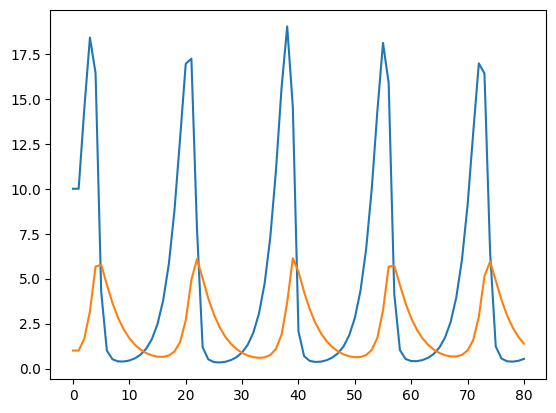

In [11]:
from deepchem.utils.differentiation_utils.integrate.ode import solver_euler_1_new3
import matplotlib.pyplot as plt
import numpy as np

def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params
    return [np.array(a * y1 - b * y1 * y2), np.array(c * y2 * y1 - d * y2)]

sol = solver_euler_1_new3(ode=lotka_volterra, y_start=[10, 1], t=np.linspace(0, 50, num=80), args= np.array([1.1, 0.4, 0.1, 0.4]))
plt.plot(sol)
plt.show()

In [13]:
from typing import List

def solver_euler_1_n(ode, t_start: float, y_start: List[List[int]], t_step: float, t_end: float):
    steps = round((t_end - t_start)/t_step)
    n_var = len(y_start)
    Y = y_start.copy()
    T = [t_start]
    for i in range(steps):
        for f in range(n_var):
            Y[f].append(Y[f][-1] + t_step * ode(T[-1], [[a[-1]] for a in Y])[f])
        T.append(T[-1] + t_step)
    return T, Y


In [14]:
from typing import List

def solver_euler_1_new(ode, t_start: float, y_start: List[List[int]], t_step: float, t_end: float):
    steps = round((t_end - t_start)/t_step)
    n_var = len(y_start)
    Y = y_start.copy()
    T = [t_start]
    for i in range(steps):
        for f in range(n_var):
            Y[f].append(Y[f][-1] + t_step * ode(T[-1], [[a[-1]] for a in Y])[f])
        T.append(T[-1] + t_step)
    return T, Y

In [114]:
a = np.array([10, 1])
np.expand_dims([10, 1], 1)

array([[10],
       [ 1]])

In [108]:

def solver_euler_1_new(ode, y_start: List[int], t_start: float, t_step: float, t_end: float):
    steps = round((t_end - t_start)/t_step)
    n_var = len(y_start)
    Y = [[a] for a in y_start]
    T = [t_start]
    for i in range(steps):
        for f in range(n_var):
            #print(Y[f][-1] + t_step * ode([m[-1] for m in Y], T[-1])[f])
            Y[f].append(Y[f][-1] + t_step * ode([m[-1] for m in Y], T[-1])[f])
        T.append(T[-1] + t_step)
    return Y

def solver_euler_1_new2(ode, y_start: List[int], t_start: float, t_step: float, t_end: float):
    steps = round((t_end - t_start)/t_step)
    n_var = len(y_start)
    Y = [[a] for a in y_start]
    T = [t_start]
    for i in range(steps):
        for f in range(n_var):
            Y[f].append(Y[f][-1] + t_step * ode([m[-1] for m in Y], T[-1])[f])
        T.append(T[-1] + t_step)
    Y = np.array(Y).T
    return Y


array([], dtype=float64)

In [61]:
a : np.ndarray = np.array([])


True

[ 0.          1.05263158  2.10526316  3.15789474  4.21052632  5.26315789
  6.31578947  7.36842105  8.42105263  9.47368421 10.52631579 11.57894737
 12.63157895 13.68421053 14.73684211 15.78947368 16.84210526 17.89473684
 18.94736842 20.        ]


ValueError: x and y must have same first dimension, but have shapes (40,) and (2,)

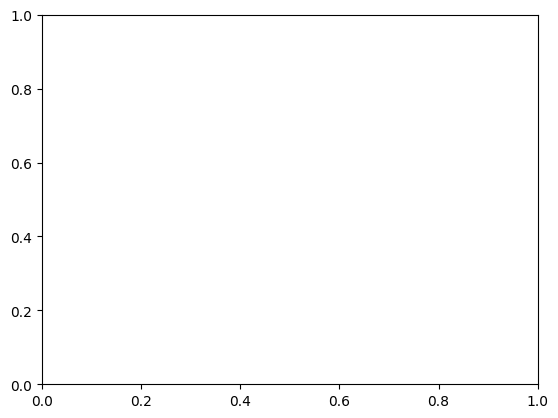

In [80]:
from typing import List
import matplotlib.pyplot as plt

def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params

    return [np.array(a * y1 - b * y1 * y2), np.array(c * y2 * y1 - d * y2)]

def solver_euler_1_new3(ode, y_start: np.ndarray, t: np.ndarray, t_eval: np.ndarray = None, args:np.ndarray=np.array([])):
    n_var = len(y_start)
    Y = [[a] for a in y_start]
    t_i = t[0]
    if t_eval.size == 0:
        t_eval = t.copy()
    print(t_eval)
    Y_res = [[a] for a in y_start]
    for i in t[1:]:
        for f in range(n_var):
            nxt = Y[f][-1] + (i-t_i) * ode([m[-1] for m in Y], i, args)[f]
            Y[f].append(nxt)
            if i in t_eval:
                Y_res[f].append(nxt)
        t_i = i

    #Y = np.array(Y).T
    Y_res = np.array(Y_res).T
    return Y_res

#sol = solver_euler_1_new(lotka_volterra, [10, 1], np.linspace(0, 20, num=50))
sol = solver_euler_1_new3(lotka_volterra, np.array([10.0, 1.0]), np.linspace(0, 20, num=40), np.linspace(0, 20, num=20), np.array([1.1, 0.4, 0.1, 0.4]))
plt.plot(np.linspace(0, 50, num=40) , [a[0] for a in sol])
plt.plot(np.linspace(0, 50, num=40) , [a[1] for a in sol])
plt.show()

In [31]:
fish_pop[0], bears_pop[0]

(10.053157485883954, 0.7833530029833511)

In [10]:
import pandas as pd
import scipy.optimize
from scipy.integrate import odeint
import numpy as np

dataset = pd.read_csv('assets/population_data.csv')
years = dataset['year'].to_numpy() / 2
fish_pop = dataset['fish_hundreds'].to_numpy()
bears_pop = dataset['bears_hundreds'].to_numpy()

def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params

    return [np.array(a * y1 - b * y1 * y2), np.array(c * y2 * y1 - d * y2)]

def solver_euler_1_new3(ode, y_start: np.ndarray, t: np.ndarray, args:np.ndarray=np.array([])):
    n_var = len(y_start)
    Y = [[a] for a in y_start]
    t_i = t[0]
    for i in t:
        for f in range(n_var):
            Y[f].append(Y[f][-1] + (i-t_i) * ode([m[-1] for m in Y], i, args)[f])
        t_i = i
    Y = np.array(Y).T
    return Y

def loss_function(params, years,fish_pop, bears_pop):

    y0 = [fish_pop[0], bears_pop[0]]

    t = np.linspace(years[0], years[-1], num=len(years))

    output = solver_euler_1_new3(lotka_volterra, y0, t, args=params)

    loss = 0

    for i in range(len(years)):
        data_fish = fish_pop[i]
        model_fish = output[i,0]

        data_bears = bears_pop[i]
        model_bears = output[i,1]

        res = (data_fish - model_fish)**2 + (data_bears - model_bears)**2

        loss += res

    return(loss)

params0 = np.array([0.1, 0.1, .1, .1])
minimum = scipy.optimize.fmin(loss_function, params0, args=(years,fish_pop, bears_pop))

alpha_fit = minimum[0]
beta_fit = minimum[1]
delta_fit = minimum[2]
gamma_fit = minimum[3]

params = [alpha_fit, beta_fit, delta_fit, gamma_fit]

y0 = [fish_pop[0], bears_pop[0]]


t = np.linspace(years[0], years[-1], num=1000)

output = solver_euler_1_new3(lotka_volterra, y0, t, args=params)

/tmp/ipykernel_91005/910571285.py:15: RuntimeWarning: overflow encountered in scalar multiply
  return [np.array(a * y1 - b * y1 * y2), np.array(c * y2 * y1 - d * y2)]
/tmp/ipykernel_91005/910571285.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  return [np.array(a * y1 - b * y1 * y2), np.array(c * y2 * y1 - d * y2)]
/tmp/ipykernel_91005/910571285.py:45: RuntimeWarning: overflow encountered in scalar power
  res = (data_fish - model_fish)**2 + (data_bears - model_bears)**2
/tmp/ipykernel_91005/910571285.py:52: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  minimum = scipy.optimize.fmin(loss_function, params0, args=(years,fish_pop, bears_pop))


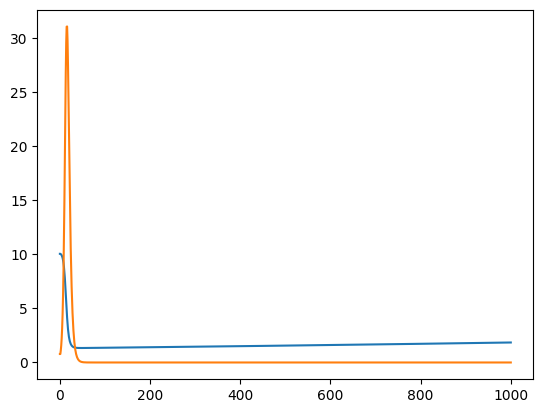

In [17]:
import matplotlib.pyplot as plt

plt.plot(output)

In [ ]:
#minimum = scipy.optimize.fmin(loss_function, params0, args=(years,fish_pop, bears_pop))


#alpha_fit = minimum[0]
#beta_fit = minimum[1]
#delta_fit = minimum[2]
#gamma_fit = minimum[3]

#params = [alpha_fit, beta_fit, delta_fit, gamma_fit]

#y0 = [fish_pop[0], bears_pop[0]]


# = np.linspace(years[0], years[-1], num=1000)

#output = solver_euler_1_new3(lotka_volterra, y0, t, args=(params,))

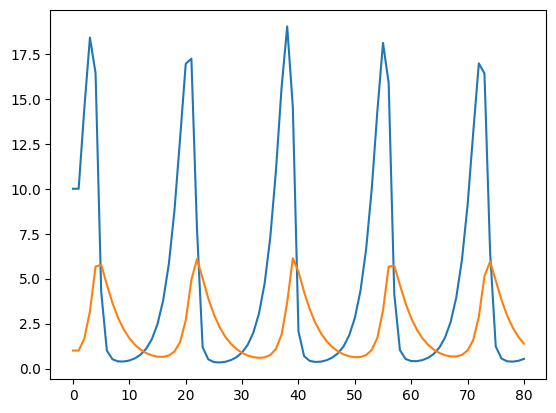

In [10]:
from deepchem.utils.differentiation_utils.integrate.ode import solver_euler_1_new3

def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params
    return [np.array(a * y1 - b * y1 * y2), np.array(c * y2 * y1 - d * y2)]

#sol = solver_euler_1_new(lotka_volterra, 0.0, [10, 1], 0.1, 50)
import matplotlib.pyplot as plt
import numpy as np

sol = solver_euler_1_new3(lotka_volterra, [10, 1], np.linspace(0, 50, num=80), args= np.array([1.1, 0.4, 0.1, 0.4]))
plt.plot(sol)
plt.show()

[[10.          1.        ]
 [12.96916017  1.35679623]
 [15.46281082  2.06724019]
 [15.69994486  3.35404861]
 [12.35440985  5.10701978]
 [ 7.42433086  6.48881465]
 [ 3.85152021  6.8911625 ]
 [ 1.99832072  6.56493384]
 [ 1.12655962  5.9300191 ]
 [ 0.71003872  5.22388179]
 [ 0.50144061  4.54591426]
 [ 0.39362663  3.93137943]
 [ 0.33960443  3.3890584 ]
 [ 0.31826681  2.9171941 ]
 [ 0.32042919  2.51009236]
 [ 0.34311846  2.16090402]
 [ 0.38731536  1.86281685]
 [ 0.45729545  1.60956322]
 [ 0.56086964  1.39562799]
 [ 0.71030194  1.21633074]
 [ 0.92389825  1.06787097]
 [ 1.22836075  0.94739369]
 [ 1.66201122  0.85313391]
 [ 2.27882909  0.7847314 ]
 [ 3.15268523  0.74389472]
 [ 4.37954721  0.73580667]
 [ 6.07118263  0.7721745 ]
 [ 8.32307074  0.87805658]
 [11.11389286  1.10721222]
 [14.05186148  1.57311739]
 [15.93483874  2.48069787]
 [14.82622948  3.99860693]
 [10.46074289  5.73110812]
 [ 5.83108739  6.7568968 ]
 [ 2.9818525   6.82688472]
 [ 1.5870584   6.34255878]
 [ 0.93218722  5.66206566]
 

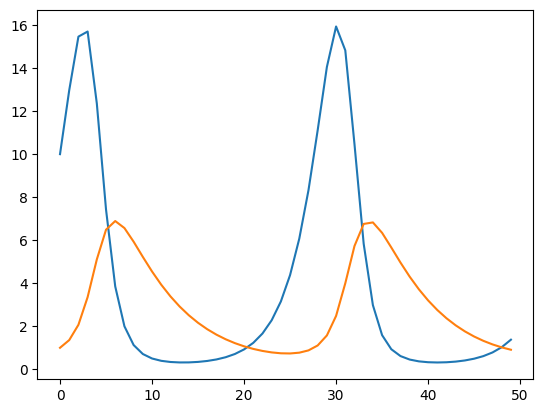

In [26]:
def lotka_volterra(y, x):
    y1, y2 = y

    return [np.array(1.1 * y1 - 0.4 * y1 * y2), np.array(0.1 * y2 * y1 - 0.4 * y2)]

#sol = solver_euler_1_new(lotka_volterra, 0.0, [10, 1], 0.1, 50)
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

sol = odeint(lotka_volterra, [10, 1], np.linspace(0, 20, num=50))
print(sol)
plt.plot(sol)
plt.show()
#plt.plot(sol[0], sol[1][1], color='r')

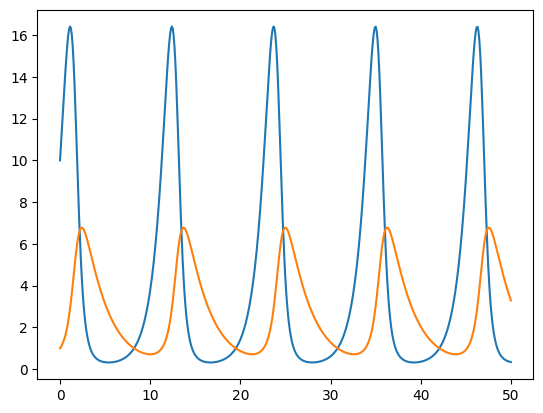